Import all necessary python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
from pathlib import Path
import numpy as np
import itertools

# background of the experiment


We have recorded flow cytometry data for several strains.

In all cases, we removed the old carbon source, and cells were shifted to galactose growth (either 2 or 0.2%) at the start of the experiment.

So we are expecting that they will start to express genes in the gal cluster to make use of the new carbon source.

Two strains carry either the Gal1p (YET911) or DOA1p (YET937) tagged with mScarlet.

This means, that when the cells induce the expression of GAL1, they will also start producing mScalet.

The mScarlet we can see as an increase in fluorescence.

One strain is the WT strain (untagged; YET181). 

As EXTRA we also included the YET938 strain which you can start with after finishing the notebook for the other strains.

![title](imgs/used_strains_flowcyto.png)

# Now, let's look at the data

The flow cytometer data have been exported as .csv files

In [2]:
paths = [
    fr'/Users/liucheng/Desktop/Flow cytometry/practical data/GLu or RAAF pregrown_0.2GAL induction_911_937_timepoints(min)/*.csv',
    fr'/Users/liucheng/Desktop/Flow cytometry/practical data/GLu or RAAF pregrown_2GAL induction_911_937_timepoints(min)/*.csv',
    fr'/Users/liucheng/Desktop/Flow cytometry/practical data/extra/0.2GAL induction/*.csv',
    fr'/Users/liucheng/Desktop/Flow cytometry/practical data/extra/2GAL induction/*.csv',
    
]

#select one of the induction experiments
i=0

files=sorted(glob(paths[i]))

# show example naming format


Path(files[0]).stem

'911_2GLU02GAL_T0'

Now let's load the data in a gigantic dataframe.

In [3]:

dfs=[]

for file in files:

    #get meta-data from filename for two induction experiments
    strain, condition, time = Path(file).stem.split('_')
    time = float(time[1:])

    #load data in pandas dataframe and add meta-data to frame
    df=pd.read_csv(file)
    df['strain']=strain
    df['condition']=condition
    df['time']=time
    dfs.append(df)
    
comb_df=pd.concat(dfs).reset_index(drop=True)
comb_df = comb_df[comb_df.columns[1:]]

## Inspect the resulting combined DataFrame

In [4]:
comb_df.head()

,FSC-H,FSC-A,SSC-H,SSC-A,GFP-488nm-H,GFP-488nm-A,Red-488nm-H,Red-488nm-A,CFP-405nm-H,CFP-405nm-A,...,RFP-405nm-A,RFP-561nm-H,RFP-561nm-A,FarRed-561nm-H,FarRed-561nm-A,FSC-Width,Time,strain,condition,time
0,232854.9,245506.0,170148.5,172623.4,1048.9,1110.7,175.9,-65.8,365.2,143.3,...,447.7,556.9,66.9,249.0,21.4,1079.6642,0.0,911,2GLU02GAL,0.0
1,181177.7,209409.0,144541.8,147899.9,681.5,1030.9,328.4,130.9,393.3,187.7,...,213.2,435.5,159.8,245.1,-65.8,1183.5691,2.0,911,2GLU02GAL,0.0
2,395829.8,713877.3,416656.0,654776.4,1960.3,2586.2,399.9,117.8,492.5,59.6,...,1112.2,373.5,-125.5,231.2,-260.8,1846.8044,12.0,911,2GLU02GAL,0.0
3,214253.0,302397.9,230508.3,262666.7,1453.9,1143.9,391.8,92.1,559.2,172.2,...,480.2,411.3,-45.6,328.7,75.2,1445.3113,25.0,911,2GLU02GAL,0.0
4,300825.7,435395.5,334834.6,403214.4,1956.4,2019.9,327.7,296.7,376.3,100.4,...,771.7,447.0,342.5,217.2,127.5,1482.0792,35.0,911,2GLU02GAL,0.0


In [5]:
comb_df.tail()

,FSC-H,FSC-A,SSC-H,SSC-A,GFP-488nm-H,GFP-488nm-A,Red-488nm-H,Red-488nm-A,CFP-405nm-H,CFP-405nm-A,...,RFP-405nm-A,RFP-561nm-H,RFP-561nm-A,FarRed-561nm-H,FarRed-561nm-A,FSC-Width,Time,strain,condition,time
4199995,273360.6,391933.4,280366.9,326496.6,2008.6,2246.2,1181.3,887.3,462.3,522.4,...,1063.2,988.2,745.0,906.5,901.4,1468.1716,1188895.0,937,2RAF02GAL,90.0
4199996,119432.8,124890.1,62428.7,60672.1,839.1,283.7,514.3,311.4,270.5,-327.5,...,420.4,490.1,93.5,279.5,220.1,1070.7921,1188928.0,937,2RAF02GAL,90.0
4199997,303834.6,379522.0,244307.5,280027.9,1462.5,1733.0,921.6,368.5,413.9,97.0,...,531.5,836.3,997.7,740.0,782.0,1279.0968,1188929.0,937,2RAF02GAL,90.0
4199998,243274.9,318208.8,205399.4,229879.3,1237.4,1162.9,695.1,478.3,329.4,77.9,...,727.4,751.6,608.5,464.8,279.4,1339.4266,1188931.0,937,2RAF02GAL,90.0
4199999,170056.0,176181.7,104270.1,102569.4,1035.9,685.5,371.9,468.0,527.4,114.4,...,451.3,386.4,217.9,450.1,440.6,1060.8820,1189031.0,937,2RAF02GAL,90.0


# guide to data:

We can see that the dataframe has several columns:
<br>
H in general means height of the signal
<br>
A in general means area of the signal
<br>
<br>

#### In terms of fluorescence, we are interested in the channel
FarRed-561nm-A (has the mScarlet fluorescence)
<br>


#### In terms of morphology, we are interested in channels 
FSC-A (forward scatter)
<br>
SSC-A (side scatter)

- What are the different 'morphology' channels a measure for and why?

Write you answer here.
FSC-A (Forward Scatter):

FSC-A measures the intensity of light scattered in the forward direction, which is usually collected at a low angle relative to the laser beam.
It provides information about the size or volume of the particle or cell.
Larger particles or cells will generally produce higher FSC-A signals, indicating their larger size or volume.
FSC-A can be used to estimate cell size or detect changes in cell size, such as in cell proliferation or apoptosis.
SSC-A (Side Scatter):

SSC-A measures the intensity of light scattered at a wide angle (usually 90 degrees) relative to the laser beam.
It provides information about the granularity or internal complexity of the particle or cell.
Particles or cells with more internal complexity (e.g., granules, organelles) will generally produce higher SSC-A signals.
SSC-A can be used to assess cellular complexity, such as distinguishing different cell types based on their granularity or detecting changes in cellular composition, such as activation or maturation.


In [6]:
# to scale absolute fluorescence values to a concentration, divide each cell's fluorescence value
# by that cell's FSC value.
comb_df['FarRed_norm'] = comb_df['FarRed-561nm-A'] / comb_df['FSC-A']

## Let's look at what are the different values in our newly formed DataFrame. 

We can use the function df['column'].unique() to print the unique values of each column.  

In [7]:
comb_df['condition'].unique()

array(['2GLU02GAL', '2RAF02GAL'], dtype=object)

In [8]:
comb_df['strain'].unique()

array(['911', '937'], dtype=object)

In [9]:
sorted(comb_df['time'].unique())

[0.0,
 15.0,
 30.0,
 45.0,
 60.0,
 75.0,
 90.0,
 105.0,
 120.0,
 135.0,
 150.0,
 165.0,
 180.0,
 195.0,
 210.0,
 225.0,
 240.0,
 255.0,
 270.0,
 285.0,
 300.0]

# let's try to index a single strain / transition and timepoint combination:

In [10]:
#select which strain/ condition and timepoint
sel_strain=comb_df['strain'].unique()[0]
sel_condition=comb_df['condition'].unique()[0]
sel_time=sorted(comb_df['time'].unique())[0]

print(f'selected strain: {sel_strain}, to/from: {sel_condition}, at timepoint: {sel_time}')

selected strain: 911, to/from: 2GLU02GAL, at timepoint: 0.0


## Now your turn:

How many values does a single condition/strain and timepoint contain?

In [11]:
comb_df[
    (comb_df['strain']==sel_strain) 
    & (comb_df['condition']==sel_condition)
    & (comb_df['time']==sel_time)
]

# The & operator is used to combine the three conditions element-wise using logical AND. It returns a boolean Series that is True only for rows where all three conditions are True.

,FSC-H,FSC-A,SSC-H,SSC-A,GFP-488nm-H,GFP-488nm-A,Red-488nm-H,Red-488nm-A,CFP-405nm-H,CFP-405nm-A,...,RFP-561nm-H,RFP-561nm-A,FarRed-561nm-H,FarRed-561nm-A,FSC-Width,Time,strain,condition,time,FarRed_norm
0,232854.9,245506.0,170148.5,172623.4,1048.9,1110.7,175.9,-65.8,365.2,143.3,...,556.9,66.9,249.0,21.4,1079.6642,0.0,911,2GLU02GAL,0.0,0.000087
1,181177.7,209409.0,144541.8,147899.9,681.5,1030.9,328.4,130.9,393.3,187.7,...,435.5,159.8,245.1,-65.8,1183.5691,2.0,911,2GLU02GAL,0.0,-0.000314
2,395829.8,713877.3,416656.0,654776.4,1960.3,2586.2,399.9,117.8,492.5,59.6,...,373.5,-125.5,231.2,-260.8,1846.8044,12.0,911,2GLU02GAL,0.0,-0.000365
3,214253.0,302397.9,230508.3,262666.7,1453.9,1143.9,391.8,92.1,559.2,172.2,...,411.3,-45.6,328.7,75.2,1445.3113,25.0,911,2GLU02GAL,0.0,0.000249
4,300825.7,435395.5,334834.6,403214.4,1956.4,2019.9,327.7,296.7,376.3,100.4,...,447.0,342.5,217.2,127.5,1482.0792,35.0,911,2GLU02GAL,0.0,0.000293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,363652.9,510830.3,400235.7,467917.4,1683.4,1796.9,430.0,284.7,433.6,-7.6,...,466.3,224.3,367.2,315.5,1438.4498,1292099.0,911,2GLU02GAL,0.0,0.000618
49996,189015.0,191155.2,130676.3,127848.8,426.4,184.7,273.8,-35.5,368.6,-132.5,...,441.1,12.6,303.7,15.3,1035.6320,1292130.0,911,2GLU02GAL,0.0,0.000080
49997,243530.3,274196.2,157910.5,158072.4,1371.9,1323.9,217.6,217.9,358.9,179.4,...,350.0,-162.7,258.2,-132.9,1152.9524,1292158.0,911,2GLU02GAL,0.0,-0.000485
49998,323192.0,437292.7,372689.4,449065.6,1631.5,1615.9,316.4,116.4,386.6,87.0,...,396.2,-32.5,192.6,-238.6,1385.5139,1292160.0,911,2GLU02GAL,0.0,-0.000546


In [12]:
comb_df.columns

Index(['FSC-H', 'FSC-A', 'SSC-H', 'SSC-A', 'GFP-488nm-H', 'GFP-488nm-A',
       'Red-488nm-H', 'Red-488nm-A', 'CFP-405nm-H', 'CFP-405nm-A',
       'RFP-405nm-H', 'RFP-405nm-A', 'RFP-561nm-H', 'RFP-561nm-A',
       'FarRed-561nm-H', 'FarRed-561nm-A', 'FSC-Width', 'Time', 'strain',
       'condition', 'time', 'FarRed_norm'],
      dtype='object')

Write your answer here.

# let's look at how the mean of the log fluorescence changes over time for each sample:

In [13]:
# looping through samples and timepoints:

channel = 'FarRed_norm' 

means = pd.DataFrame()

for sel_strain in comb_df['strain'].unique():
    for sel_condition in comb_df['condition'].unique():
        sample_means = []
        for sel_time in sorted(comb_df['time'].unique()[:-1]):
        
            df = comb_df[
                (comb_df['strain']==sel_strain) 
                & (comb_df['condition']==sel_condition)
                & (comb_df['time']==sel_time)
            ]

            # allow only positive values
            df = df[(df[channel]>0)]


            mean = np.mean(np.log(df[channel]))
            sample_means.append(mean)

        means[f'{sel_strain}, {sel_condition}'] = sample_means

In [14]:
# and let's add the times
means['time'] = sorted(comb_df['time'].unique())[:-1]

In [15]:
# inspect
means.head()
means.tail()

,"911, 2GLU02GAL","911, 2RAF02GAL","937, 2GLU02GAL","937, 2RAF02GAL",time
15,-7.598346,-1.445505,-6.490706,-6.596860,225.0
16,-7.595300,-1.397130,-6.480444,-6.601983,240.0
17,-7.589803,-1.338168,-6.477087,-6.614590,255.0
18,-7.562212,-1.286375,-6.474511,-6.606121,270.0
19,-7.568053,-1.228695,-6.482361,-6.606866,285.0


### your turn

plot the means of the log fluorescence values over time

In [16]:
means.columns
colors=['red','darkred','blue','black']

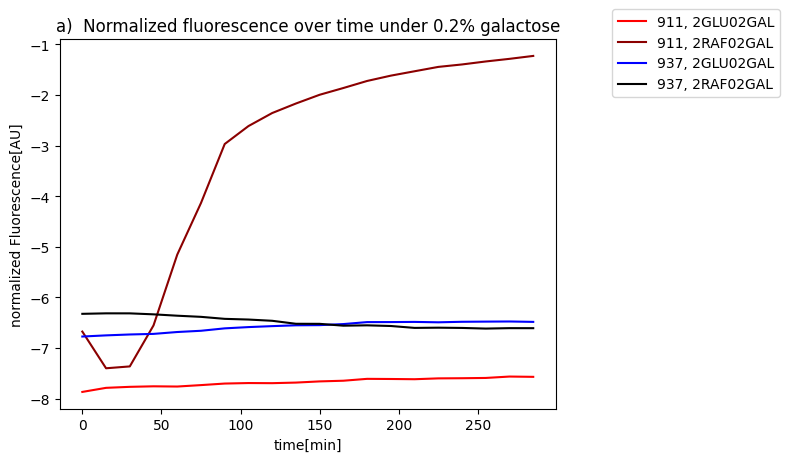

In [17]:
# your code here
fig, ax = plt.subplots(facecolor='white')

#change the value inside the set_index function
means.set_index(['time']).plot(color=colors, ax=ax)

# Change to location of the legend. 
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
ax.set_title('a)  Normalized fluorescence over time under 0.2% galactose')
ax.set_xlabel('time[min]')
ax.set_ylabel('normalized Fluorescence[AU]')

#uncomment the line below to save the image
plt.savefig('flowcyto_over_time_green.png')

Describe what you see:

 - Are there differences between the two strains?
    
 - Are there differences between the conditions?
 
 
 

# distributions

in general, we are expecting log-normal distributions, so let's do a transformation on one of the strain + condition combinations which mean fluorescence seems to increase over time:

Let's first look at the strain / condition combination where something interesting seems to occur!

In [18]:
sel_strain='911' # fill in which strain you want to look at
sel_condition='2RAF02GAL' # fill in which condition you want to look at

In [19]:
df = comb_df[
            (comb_df['strain']==sel_strain) 
            & (comb_df['condition']==sel_condition)
            & (comb_df['time']==0) # the first time point is selected
]

/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'fluorescence (log)')

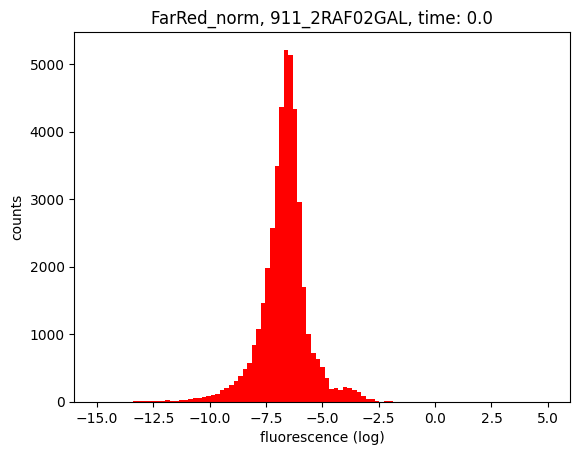

In [20]:
plt.hist(np.log(df[channel]), bins=np.linspace(-15,5, 100), color='red'); 
# np.linspace(0,15,100) gives us 100 evenly spaced values between 0 and 15

plt.title(f'{channel}, {df.strain.values[0]}_{df.condition.values[0]}, time: {df.time.values[0]}')
plt.ylabel('counts')
plt.xlabel('fluorescence (log)')

Now lets look at the next time point of this sample.

Text(0.5, 0, 'fluorescence (log)')

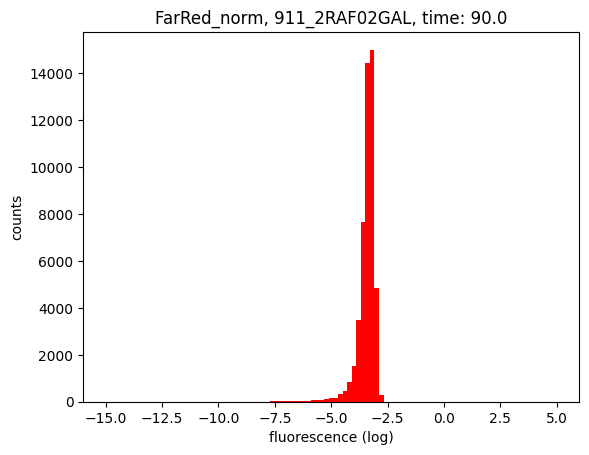

In [21]:
df = comb_df[
            (comb_df['strain']==sel_strain) 
            & (comb_df['condition']==sel_condition)
            & (comb_df['time']==90) # timepoint at 90 mins is selected.
]

# let's now look at a later timepoint
plt.hist(np.log(df[channel]), bins=np.linspace(-15, 5, 100), color='red'); 

# np.linspace(0,15,100) gives us 100 evenly spaced values between 0 and 15

plt.title(f'{channel}, {df.strain.values[0]}_{df.condition.values[0]}, time: {df.time.values[0]}')
plt.ylabel('counts')
plt.xlabel('fluorescence (log)')

Is the observed shift to be expected?

type you answer here.

Can this shift be observed in the other strains / conditions?

type you answer here.

# let's now look at all timepoints for these experiments together

Next we will use matplotlib subplots to plot all our time series data of the entire induction experiment. 
Multiplot subplots often involve nested for loops, which are complicated to understand. Take your time to understand what is happenning in the code below. Then try to interpret the resulting plots.

First, we will define a function to clean up our image labels and ticklabels.

In [22]:
def clean_up_mulitplot(axes,y,x):
    #cleaning up the figure
    #add title headings to the top of the column and remove ticklabels
    if y==0:
        axes[y,x].set_title(f'{strain}: {condition}')

    if x!=0:
        axes[y,x].set_yticklabels('')

    if y!=len(comb_df.time.unique())-1:
        axes[y,x].set_xticklabels('')

Next we will create our multiplot by iterating over the different condition, strain and time combinations.

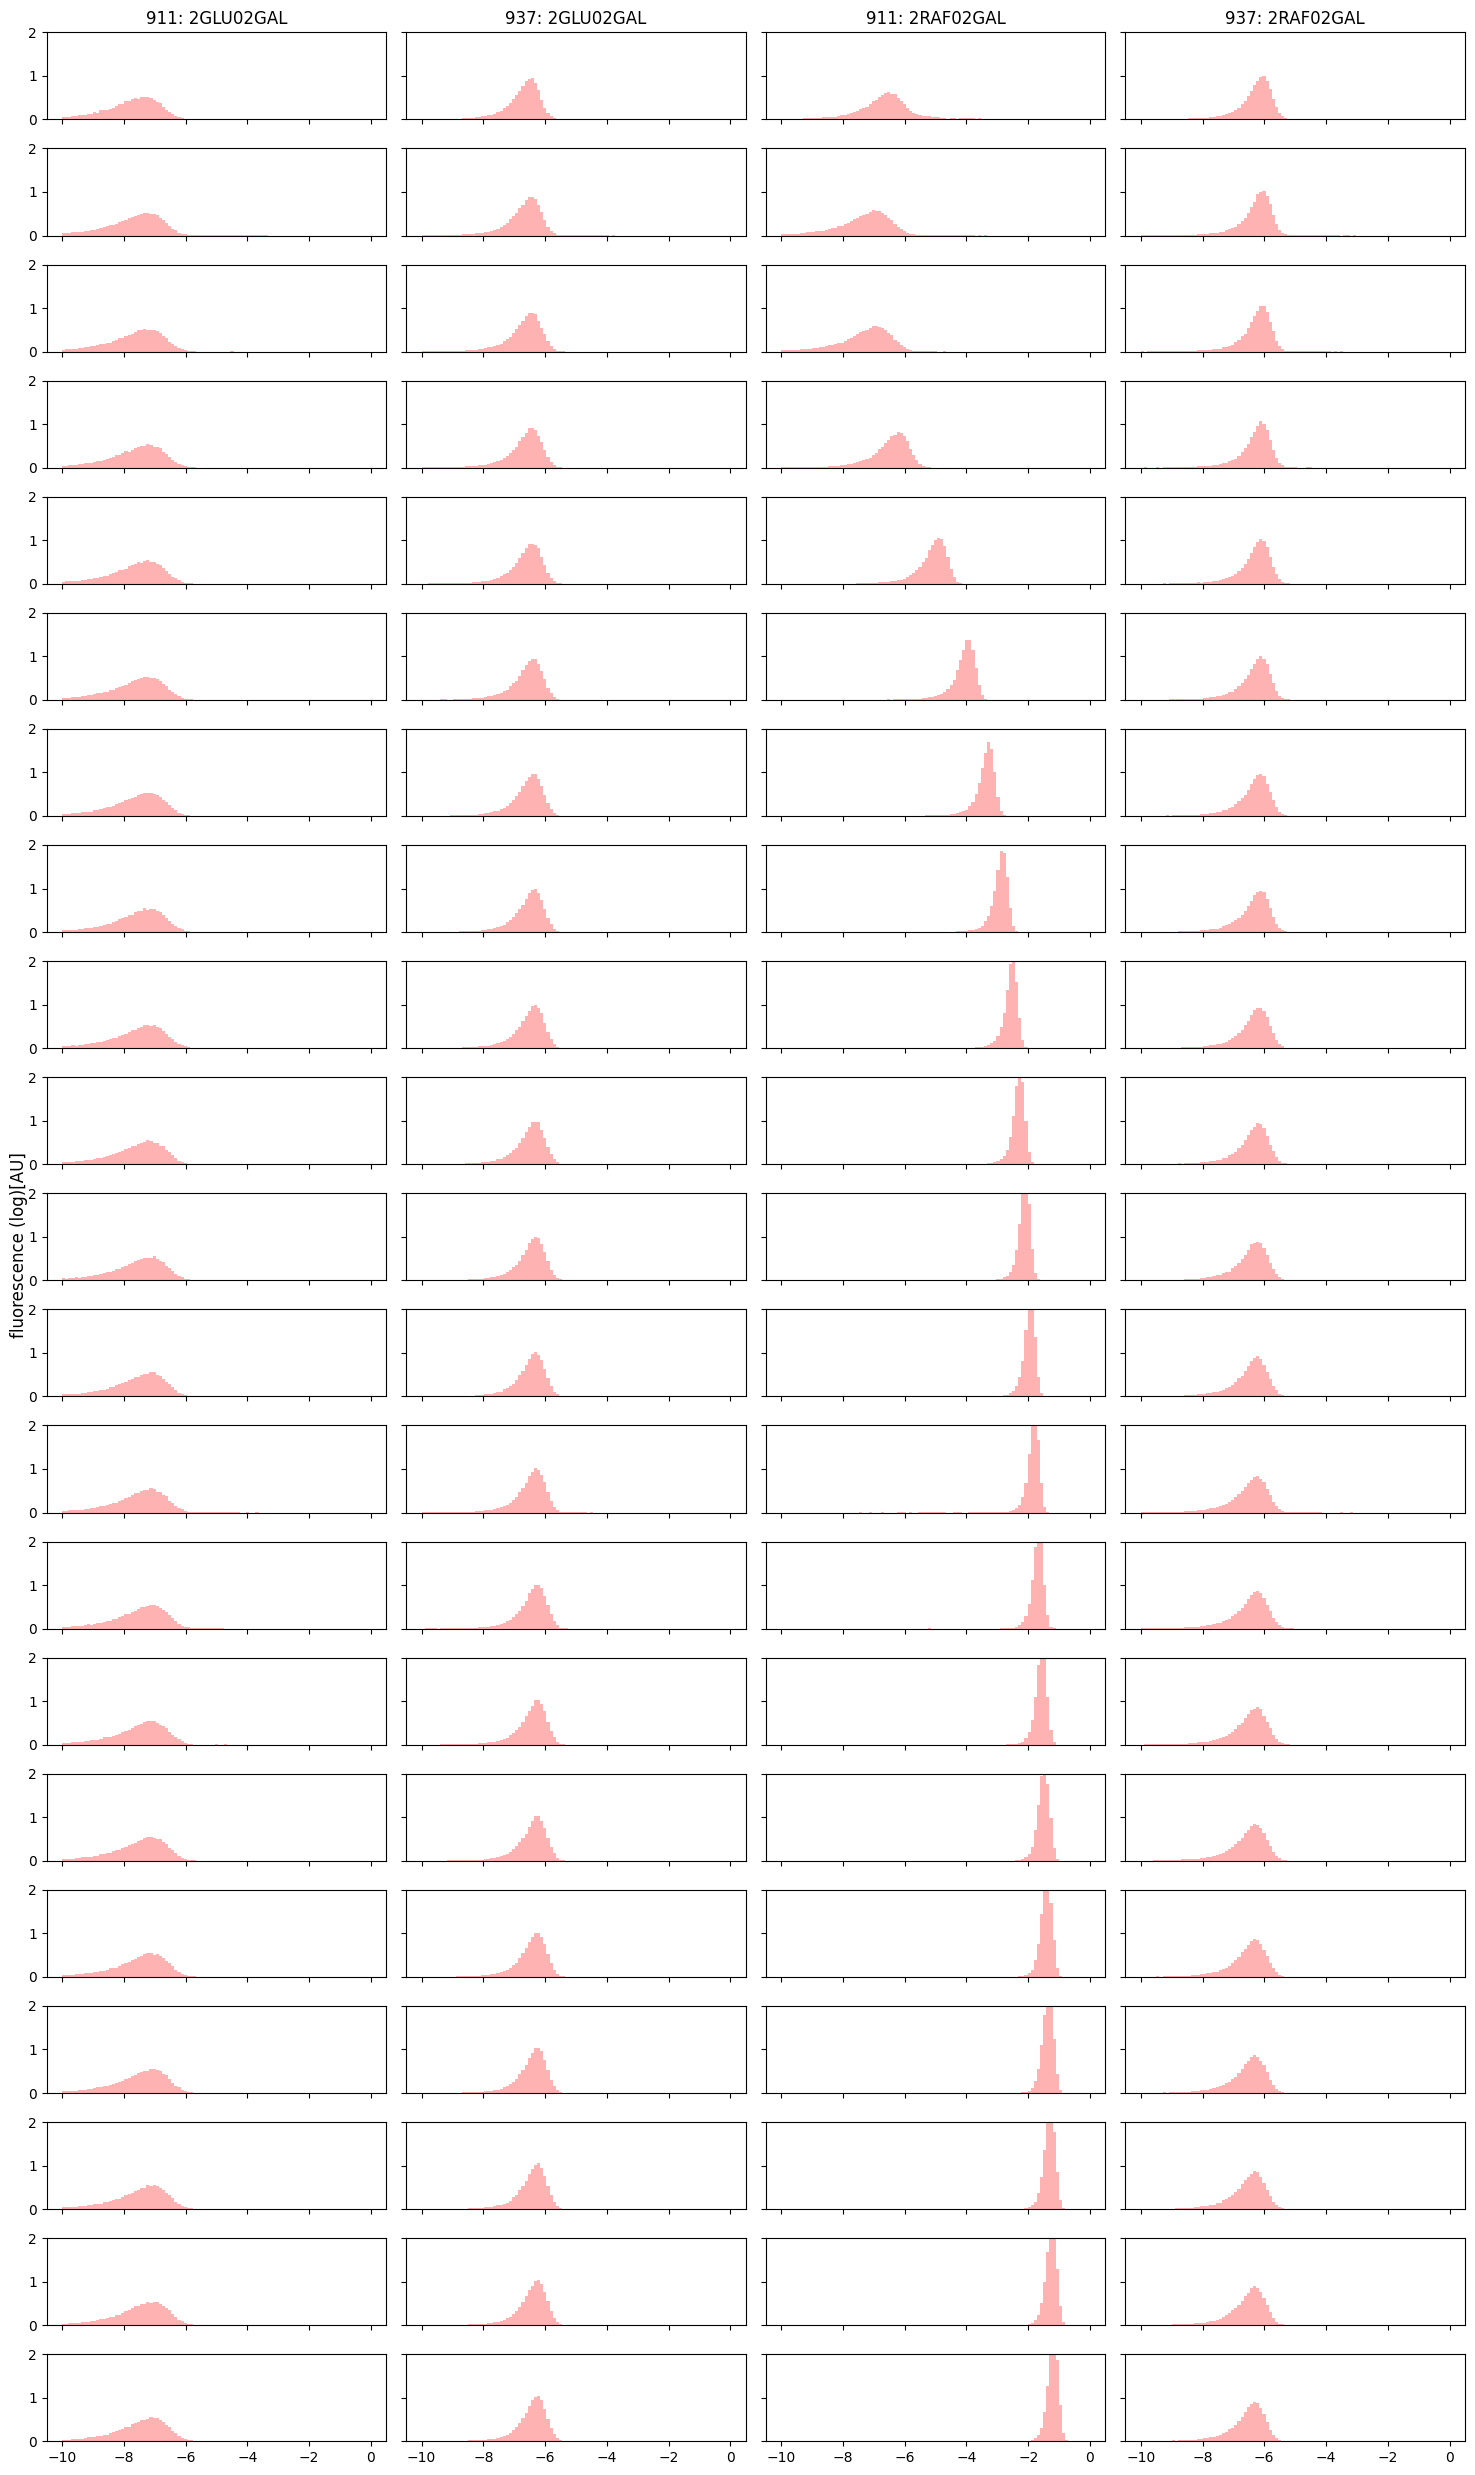

In [23]:
#create a grid
nrows=len(comb_df.time.unique())
#create a list with different time + strain combinations
condition_strain_combs=list(itertools.product(comb_df.condition.unique(),comb_df.strain.unique()))
#this is the different columns we need for our dataframe
ncols=len(condition_strain_combs)

# channel:
channel='FarRed_norm'

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,25), facecolor='white')

for (condition, strain),x in zip(condition_strain_combs,range(ncols)):
    
    df = comb_df[
        (comb_df['condition']==condition)
        & (comb_df['strain']==strain)
    ]
    
    for time,y in zip(sorted(comb_df.time.unique()),range(nrows)):
                      
        sT_df=df[df['time']==time]
        sT_df = sT_df[sT_df[channel]>0]
        
        #create the plot
        axes[y,x].hist(np.log(sT_df[channel]), bins=np.linspace(-10, 0, 100), alpha=0.3, density=True, color='red')
        
        #make sure the ylim is same for each plot
        axes[y,x].set_ylim(0,2)
        
        #call the image_clean_up function
        clean_up_mulitplot(axes,y,x)
        

            
#add one giant ylabel
fig.supylabel('fluorescence (log)[AU]')

#add one giant xlabel
fig.supxlabel('')

plt.tight_layout()

#uncomment the following line to save your image
plt.savefig('multiplot_induction.png')

#### your turn:


 - what can we conclude from the changes in the distributions over time?

type your answer here: only 911–2RAF02GAL show the increasing intensity of FarRed_norm

####  your turn:

- Repeat the analysis for the other induction experiment dataset.

# let's now look at all control experiment data

Now let's look at our control experiments. These samples were either transitioned to galactose and measured after 16 hours looks or where not transitioned at all and measured.

### your turn:
What is the purpose of these different control strains?

your text here. The purpose of the different control strains in this experiment is to provide a baseline for comparison and to evaluate the specific effects of transitioning to galactose on the measured parameters. Control strains are typically used in experiments to establish a reference point or to account for potential confounding factors.

In this case, there are two types of control strains:

Transitioned to Galactose Control: These samples were transitioned to a galactose-containing medium and then measured after 16 hours. This control group helps determine the effects of galactose induction on the measured parameters. By comparing the experimental group (samples transitioned to galactose) with this control group, researchers can isolate and analyze the specific responses and changes that occur due to galactose induction.

Not Transitioned Control: These samples were not transitioned to galactose and were measured as-is. This control group serves as a baseline for comparison, reflecting the conditions without galactose induction. It helps identify any changes that might occur naturally over the course of the experiment, independent of the galactose transition. By comparing the experimental group (samples transitioned to galactose) with this control group, researchers can differentiate between the effects of galactose induction and the inherent changes that might occur in the absence of galactose.

By including these control strains, researchers can better understand and interpret the experimental results by accounting for the effects of galactose induction and distinguishing them from other factors that might influence the measured parameters.

In [24]:
path=fr'/Users/liucheng/Desktop/Flow cytometry/practical data/Full induction control_GLU or RAF to GALON_911_937/*.csv'

#path for 937 strain 
#path=fr'practical data\extra\Full induction*.csv'

files=sorted(glob(path))
os.path.basename(files[11])

'937_2RAFGAL.csv'

In [25]:
dfs=[]
files=sorted(glob(path))
    
for file in files:

    #get meta-data from filename for first two replicates
    #get meta-data from filename for two induction experiments
    strain, condition = Path(file).stem.split('_')

    #load data in pandas dataframe and add meta-data to frame
    df=pd.read_csv(file)
    df['strain']=strain
    df['condition']=condition
    df['time']=0
    dfs.append(df)



In [26]:
ctrl_df=pd.concat(dfs)
ctrl_df=pd.concat(dfs).reset_index(drop=True)
ctrl_df = ctrl_df[ctrl_df.columns[1:]]

# forward scatter correlates strongly with particle size. 
# to scale absolute fluorescence values to a concentration, divide each cell's fluorescence value
# by that cell's FSC value.
ctrl_df['FarRed_norm'] = ctrl_df['FarRed-561nm-A'] / ctrl_df['FSC-A']
ctrl_df.columns
ctrl_df

,FSC-H,FSC-A,SSC-H,SSC-A,GFP-488nm-H,GFP-488nm-A,Red-488nm-H,Red-488nm-A,CFP-405nm-H,CFP-405nm-A,...,RFP-561nm-H,RFP-561nm-A,FarRed-561nm-H,FarRed-561nm-A,FSC-Width,Time,strain,condition,time,FarRed_norm
0,234446.8,314446.2,212382.5,250023.0,1276.0,1202.1,429.4,236.2,336.6,-62.3,...,327.6,40.5,255.9,-32.9,1373.45460,0.0,181,2GLU,0,-0.000105
1,212998.2,273431.3,214126.8,241394.6,1342.8,1275.3,374.9,432.3,579.3,252.2,...,347.6,80.9,264.8,-109.9,1314.57210,23.0,181,2GLU,0,-0.000402
2,233976.2,230967.0,127721.3,124149.8,1139.5,899.8,460.5,470.5,460.4,213.1,...,371.0,-137.6,212.4,-23.2,1010.82886,27.0,181,2GLU,0,-0.000100
3,237049.2,257116.4,169710.5,168373.2,1158.6,817.0,262.7,20.1,376.4,148.1,...,312.5,216.6,289.7,-39.0,1110.68970,29.0,181,2GLU,0,-0.000152
4,286340.2,350209.6,278118.9,293832.3,1686.2,1544.2,468.3,211.5,367.1,-41.2,...,213.6,-210.7,321.1,-8.9,1252.42380,32.0,181,2GLU,0,-0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,283681.3,354024.5,205460.4,230430.1,1870.3,2024.8,709.2,442.0,281.6,-49.3,...,735.5,567.7,582.5,196.1,1277.92080,605759.0,937,2RAFGAL,0,0.000554
599996,222434.6,232408.8,198747.6,196443.6,1092.3,1145.7,309.2,233.3,360.9,-23.3,...,636.0,487.0,555.3,404.2,1069.92600,605770.0,937,2RAFGAL,0,0.001739
599997,245302.5,251017.2,164082.0,160750.7,890.6,772.1,226.5,-63.3,379.6,-131.8,...,578.7,67.9,326.2,239.4,1047.88050,605787.0,937,2RAFGAL,0,0.000954
599998,224351.5,315152.2,217953.6,252644.4,1455.0,1652.7,528.5,254.4,410.2,189.5,...,600.4,836.4,686.3,583.2,1438.48350,605796.0,937,2RAFGAL,0,0.001851


### Now your turn!

-inspect the unique values contained in each column of the control dataframe.

In [27]:
for column in ctrl_df.columns:
    unique_values = ctrl_df[column].unique()
    
unique_values 

array([-0.00010463, -0.00040193, -0.00010045, ...,  0.00095372,
        0.00185053,  0.00150324])

# Plot the control dataframe

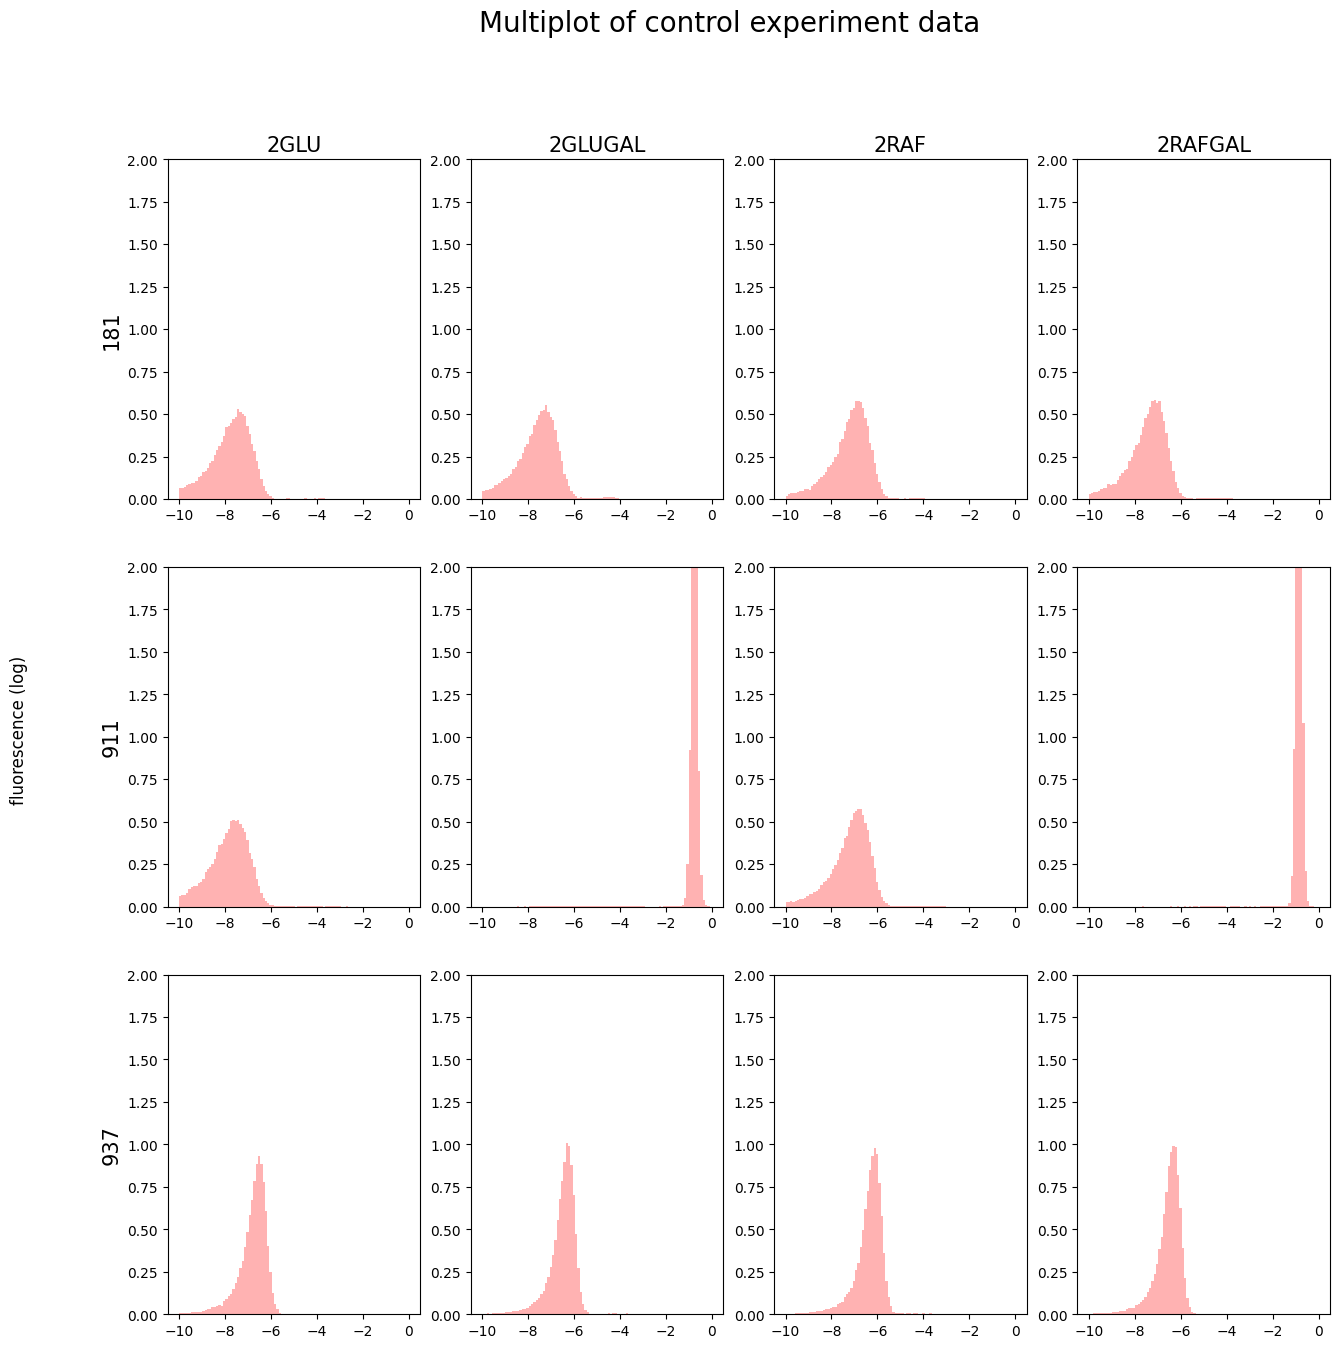

In [30]:
#create a grid
nrows=len(ctrl_df.strain.unique())
ncols=len(ctrl_df.condition.unique())

# channel:
channel='FarRed_norm'

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,15), facecolor='white')

for condition,x in zip(sorted(ctrl_df.condition.unique()),range(ncols)):
    
    for strain,y in zip(sorted(ctrl_df.strain.unique()),range(nrows)):
                      
        df = ctrl_df[
        (ctrl_df['condition']==condition)
        & (ctrl_df['strain']==strain)
        ]
# zip() is a built-in Python function that takes multiple iterables as input and returns an iterator of tuples where each tuple contains elements from the corresponding positions of the input iterables.    
        df = df[df[channel]>0]
        
        axes[y,x].hist(np.log(df[channel]), bins=np.linspace(-10, 0, 100), alpha=0.3, density=True, color='red')
        
        #make sure y range is the same for each plot
        axes[y,x].set_ylim(0,2)
        
        #add title headings to the top of the columns and each row.
        if y==0:
            axes[y,x].set_title(f'{condition}',size=15)
        if x==0:
            axes[y,x].set_ylabel(f'{strain}',size=15)
            
fig.suptitle("Multiplot of control experiment data", size=20)  # Add plot title here
            
fig.supylabel('fluorescence (log)')

#uncomment the following line to save your image
plt.savefig('multiplot_control.png')

### your turn:
- what can we learn from these control strains?

type your answer here.

- How do they compare to the other induction experiments?

type your answer here.

- Why is one of the plots empty?

type your answer here.

## your turn:

Can you recreate the multiplots above for the induction experiment but instead use scatterplot() function to plot FarRed-561nm-A vs. FSC-A. Make sure to log tranform both x and y variable.

- What are we comparing in this plot? The scatterplot allows us to examine the relationship or correlation between these two variables across different conditions and strains in the induction experiment.

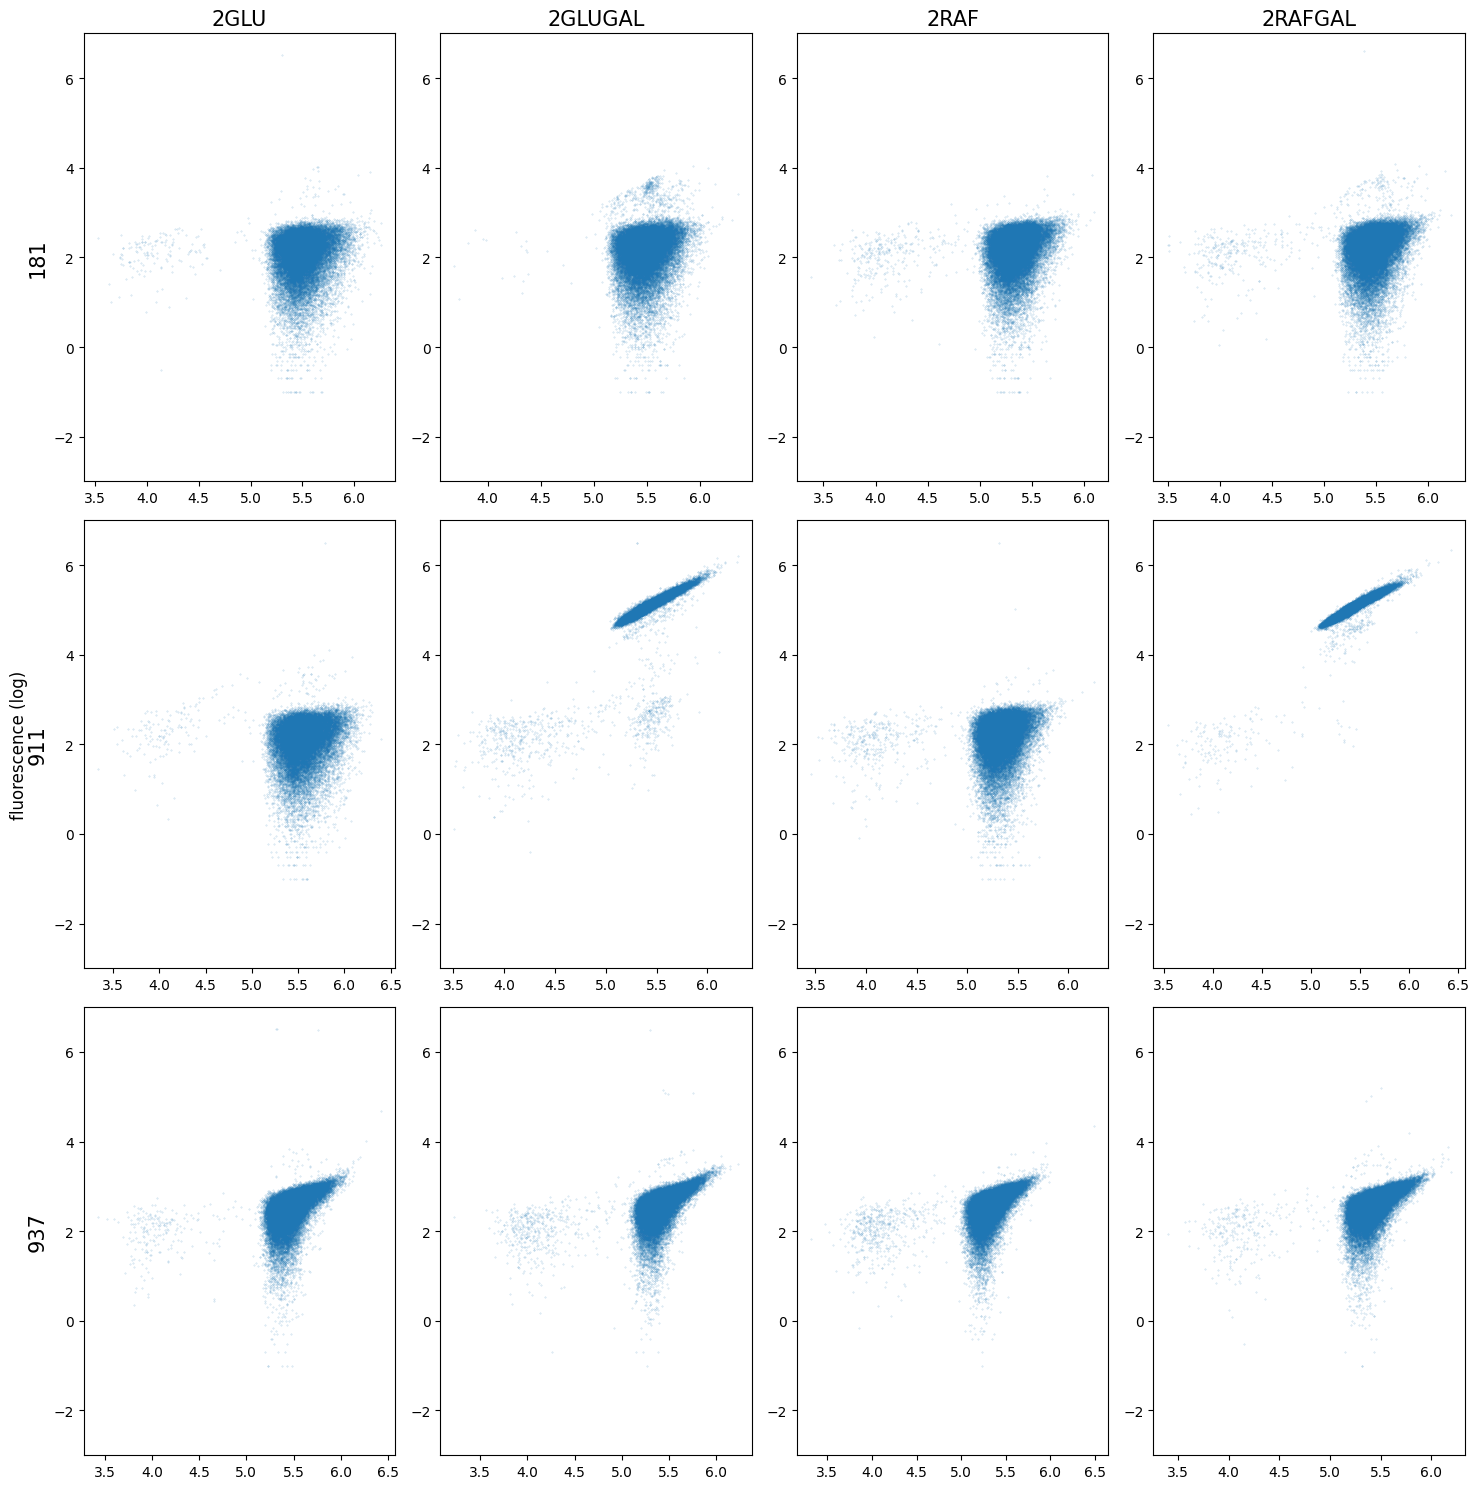

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the necessary data loaded and stored in variables ctrl_df, FarRed_A, and FSC_A

# Log transform the FarRed-561nm-A and FSC-A variables


# Create a grid
nrows = len(ctrl_df.strain.unique())
ncols = len(ctrl_df.condition.unique())

# Channel:
channel = 'FarRed_norm'

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15), facecolor='white')

for condition, x in zip(sorted(ctrl_df.condition.unique()), range(ncols)):
    for strain, y in zip(sorted(ctrl_df.strain.unique()), range(nrows)):
        df = ctrl_df[(ctrl_df['condition'] == condition) & (ctrl_df['strain'] == strain)]
        df = df[df[channel] > 0]
        
        FarRed_log = np.log10(df['FarRed-561nm-A'])
        FSC_log = np.log10(df['FSC-A'])
        
        # Plot the scatterplot
        axes[y, x].scatter(FSC_log, FarRed_log, alpha=0.3, s=0.1)
        
        # Make sure y range is the same for each plot
        axes[y, x].set_ylim(-3, 7)
        
        
        # Add title headings to the top of the columns and each row
        if y == 0:
            axes[y, x].set_title(f'{condition}', size=15)
        if x == 0:
            axes[y, x].set_ylabel(f'{strain}', size=15)

# Set the labels for the y-axis on the entire figure
fig.supylabel('fluorescence (log)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig('FarRed-561nm-A vs. FSC-A.png')




write your answer here.

You finished the practical! Make sure to save the resulting figures for your report.

## Extra:

- Plot the data for the YET938 strain as well. 